In [17]:
import warnings
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm 

# from pandas_profilinag import ProfileReport

pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

np.random.seed = 0
seed = 0
max_taken_subsector = 10
max_taken_country = 50
min_remove_sector = 5
percent_taken = 50

In [3]:
FillList = [
    # "Revenue",
    "EMP",
    "Asset",
    "NPPE",
    "INTAN",
    "CapEx",
    "Age",
    "CapInten",
    "GMAR",
    "Leverage",
    "ENEConsume",
    "ENEProduce",
    "LTDebt",
    "GPPE",
    "AccuDep",
    "COGS",
    "EBIT",
    "EBITDA",
]

LogList = [
    "Revenue",
    "CapEx",
    "GPPE",
    "NPPE",
    "AccuDep",
    "INTAN",
    "COGS",
    "EMP",
    "Asset",
    "LTDebt",
    "CF1",
    "CF2",
    "CF3",
    "CF12",
    "CF123",
    "ENEConsume",
    "ENEProduce",
    "EBIT",
    "EBITDA",
]

In [4]:
sector_classification = "GICSName" # "NAICSInd"

In [5]:
df_refinitiv = pd.read_csv("../Pipeline proprietary/data/raw_data/Refinitiv_cleaned_filtered.csv")
df_refinitiv["Age"] = df_refinitiv["GPPE"] / (df_refinitiv["EBITDA"] - df_refinitiv["EBIT"])
df_refinitiv["Age"] = df_refinitiv["Age"].replace(np.inf, np.nan)

df_refinitiv["CapInten"] = df_refinitiv["NPPE"] / df_refinitiv["Revenue"]
df_refinitiv["CapInten"] = df_refinitiv["CapInten"].replace(np.inf, np.nan)

df_refinitiv["Leverage"] = df_refinitiv["LTDebt"] / df_refinitiv["Asset"]
df_refinitiv["Leverage"] = df_refinitiv["Leverage"].replace(np.inf, np.nan)
print(df_refinitiv.shape)
df_refinitiv[:2]

(74785, 39)


,FinalEikonID,Name,CUSIP,ISIN,Ticker,CountryHQ,NAICSSector,NAICSInd,GICSSector,GICSGroup,GICSInd,GICSSubInd,GICSName,FiscalYear,CF1,CF2,CF3,CF12,CFE,EstMethod,CF123,Revenue,EBITDA,EBIT,CapEx,GPPE,NPPE,AccuDep,INTAN,COGS,GMAR,Asset,LTDebt,EMP,ENEProduce,ENEConsume,Age,CapInten,Leverage
0,KE.OQ,Kimball Electronics Inc,49428J109,US49428J1097,KE,United States of America,31-33,334412.0,45.0,4520.0,452030.0,45203020.0,Electronic Manufacturing Services,2021,NaN,NaN,NaN,NaN,54028.8,CO2,NaN,1.349535e+09,8.057600e+07,5.116500e+07,-7.471400e+07,4.810740e+08,2.099350e+08,-2.711390e+08,NaN,1.244933e+09,7.75097,1.035767e+09,1.450000e+08,7200.0,NaN,NaN,16.356941,0.155561,0.139993
1,PATA.BA,Importadora y Exportadora de la Patagonia SA,NaN,ARP530571735,PATA3,Argentina,44-45,445110.0,30.0,3010.0,301010.0,30101030.0,Food Retail,2021,NaN,NaN,NaN,NaN,47065.0,Median,NaN,1.872387e+09,4.541276e+07,1.796270e+07,-2.510657e+07,6.554016e+08,3.323554e+08,-3.230463e+08,NaN,1.376077e+09,26.50680,7.171096e+08,5.871033e+07,NaN,NaN,NaN,23.876146,0.177504,0.081871


In [6]:
mapping = pd.read_excel('../Pipeline proprietary/data/raw_data/' + "country_region_mapping.xlsx")
mapping_dict = mapping.set_index("Country").to_dict()["Region"]
df_refinitiv["Region"] = df_refinitiv["CountryHQ"].apply(lambda x: mapping_dict[x])

In [7]:
df_refinitiv = df_refinitiv.drop(df_refinitiv[(df_refinitiv.GMAR < 0) | (df_refinitiv.GMAR > 100)].index)
df_refinitiv = df_refinitiv.drop(df_refinitiv[(df_refinitiv.Age < 0) | (df_refinitiv.Age > 100)].index)
df_refinitiv = df_refinitiv.drop(df_refinitiv[(df_refinitiv.Leverage < 0) | (df_refinitiv.Leverage > 1)].index)
df_refinitiv = df_refinitiv.drop(df_refinitiv[(df_refinitiv.AccuDep > 0)].index)


In [8]:
df_refinitiv_filtered = df_refinitiv[df_refinitiv.FiscalYear>2010]
df_refinitiv_filtered.shape

(60767, 40)

In [9]:
df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.CF1>0) & (df_refinitiv_filtered.CF2>0) & (df_refinitiv_filtered.CF3>0)]
df_refinitiv_filtered.shape

(13926, 40)

In [10]:
df_refinitiv_filtered = df_refinitiv_filtered.sort_values(by="Revenue", ascending=False)
df_refinitiv_filtered = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification].notna()]

In [11]:
lst_sectors = df_refinitiv_filtered[sector_classification].unique()
lst_countries = df_refinitiv_filtered.CountryHQ.unique()
lst_companies = df_refinitiv_filtered.Name.unique()
companies_per_countries = df_refinitiv_filtered.drop_duplicates("Name").CountryHQ.value_counts()


In [12]:
df_refinitiv_filtered.drop_duplicates("Name")[sector_classification].value_counts()


Diversified Banks                   168
Packaged Foods & Meats               74
Construction & Engineering           65
Industrial Machinery                 60
Asset Management & Custody Banks     58
                                   ... 
Housewares & Specialties              2
Mortgage REITs                        2
Motorcycle Manufacturers              1
Silver                                1
Hotel & Resort REITs                  1
Name: GICSName, Length: 158, dtype: int64

In [18]:
df_company_test = []
verbose = False


# Sector based selection
lst_industry_solo = []
for sector in lst_sectors : 
    candidates = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification] == sector].Name.unique()
    rd.Random(seed).shuffle(candidates)
    if len(candidates) > 2 * max_taken_subsector : 
        # take up to max_taken_subsector companies
        df_company_test = df_company_test + candidates[:max_taken_subsector].tolist()
    elif len(candidates) > 1 : 
        # take half of available companies in test (and left the other half for train), up to lax_taken_subsector
        df_company_test = df_company_test + candidates[:int((len(candidates))/(100/percent_taken))].tolist()
    # else : # only one company 
    #     lst_industry_solo.append(sector)

df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.Name.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].nunique())
    print('\n')

# candidates_solo = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification].isin(lst_industry_solo)].Name.unique()
# rd.Random(seed).shuffle(np.array(candidates_solo))
# df_company_test = df_company_test + candidates_solo[:int((len(candidates_solo))/(100/percent_taken))].tolist()

# Country based selection
df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.Name.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].nunique())
    print('\n')

lst_country_solo = []
for country in lst_countries:
    if not(country in df_refinitiv_filtered_test.CountryHQ.tolist()) : 
        if companies_per_countries[country] == 1 : 
            lst_country_solo.append(country)
        else : 
            candidates = df_refinitiv_filtered[df_refinitiv_filtered.CountryHQ == country].Name.unique()
            rd.Random(seed).shuffle(candidates)
            df_company_test = df_company_test + candidates[:int((len(candidates)+0.5)/(100/percent_taken))].tolist()

df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.Name.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].nunique())
    print('\n')

# candidates_solo = df_refinitiv_filtered[df_refinitiv_filtered.CountryHQ.isin(lst_country_solo)].Name.unique()
# rd.Random(seed).shuffle(np.array(candidates_solo))
# df_company_test = df_company_test + candidates_solo[:int((len(candidates_solo)+0.5)/(100/percent_taken))].tolist()

df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.Name.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].nunique())
    print('\n')

country_repartition = df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.value_counts()
current_sector_repartition = df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].value_counts()

# Country based removal
for country in country_repartition[country_repartition > max_taken_country].index:
    # print(country)
    candidates_to_remove = df_refinitiv_filtered_test.drop_duplicates("Name")[df_refinitiv_filtered_test.CountryHQ==country].Name
    # print("count_ini :",len(candidates_to_remove))
    rd.Random(seed).shuffle(np.array(candidates_to_remove))
    count_removed = 0
    count_to_removed = len(candidates_to_remove) - max_taken_country
    for company in candidates_to_remove : 
        company_sector = df_refinitiv_filtered_test[df_refinitiv_filtered_test.Name==company][sector_classification].values[0]
        if current_sector_repartition[company_sector] > min_remove_sector and count_removed < count_to_removed: 
            current_sector_repartition.loc[company_sector] = current_sector_repartition.loc[company_sector] - 1
            df_company_test.remove(company)
            count_removed+=1
    # print("count_removed : ",count_removed)


df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.Name.isin(df_company_test)]
df_refinitiv_filtered_train = df_refinitiv_filtered[~(df_refinitiv_filtered.Name.isin(df_company_test))]
print("\n")
print("train")
print("nb countries :",df_refinitiv_filtered_train.drop_duplicates("Name").CountryHQ.nunique())
print("nb sectors :",df_refinitiv_filtered_train.drop_duplicates("Name")[sector_classification].nunique())
print("\n")
print("test")
print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("Name").CountryHQ.nunique())
print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("Name")[sector_classification].nunique())




train
nb countries : 64
nb sectors : 158


test
nb countries : 62
nb sectors : 155


In [19]:
df_refinitiv_filtered_test.drop_duplicates("Name").shape

(780, 40)

In [20]:
percent_data_taken =  (df_refinitiv_filtered_test.shape[0]) / df_refinitiv_filtered.shape[0]
percent_comapny_taken =  (df_refinitiv_filtered_test.drop_duplicates("Name").shape[0]) / df_refinitiv_filtered.drop_duplicates("Name").shape[0]
print("percent_data_taken : ", percent_data_taken, " %")
print("percent_company_taken : ", percent_comapny_taken, " %")

percent_data_taken :  0.24881516587677724  %
percent_company_taken :  0.2589641434262948  %


In [21]:
df_refinitiv_filtered_test.FiscalYear.value_counts()/len(df_refinitiv_filtered_test)*100 - df_refinitiv_filtered_train.FiscalYear.value_counts()/len(df_refinitiv_filtered_train)*100 
# same years repartion , test a bit significantly more recent than the train 

2011   -0.312271
2012   -0.259194
2013    0.161052
2014   -0.571647
2015   -0.539327
2016   -0.773394
2017   -0.276765
2018    0.264292
2019    0.600871
2020    0.859519
2021    0.846864
Name: FiscalYear, dtype: float64

In [25]:
df_refinitiv_filtered_test.Asset.min()

21794308.1552814

In [26]:
df_refinitiv_filtered_train.Asset.min()

43757033.403551

In [22]:
print("Columns for which the min is in test : ") # Seems better 
(df_refinitiv_filtered_train[LogList[:-7]].min() > df_refinitiv_filtered_test[LogList[:-7]].min()) 


Columns for which the min is in test : 


Revenue    False
CapEx      False
GPPE       False
NPPE       False
AccuDep    False
INTAN      False
COGS       False
EMP        False
Asset       True
LTDebt     False
CF1        False
CF2        False
dtype: bool

In [34]:
df_refinitiv_filtered_test[FillList].mean()/df_refinitiv_filtered_train[FillList].mean() 
# gross diff pour revenue, asset, intan, capex, age.

Revenue     0.796421
EMP         0.876878
Asset       0.366802
NPPE        0.812927
INTAN       0.449826
CapEx       0.656401
Age         1.091410
CapInten    1.326751
GMAR        0.960643
Leverage    1.068454
dtype: float64

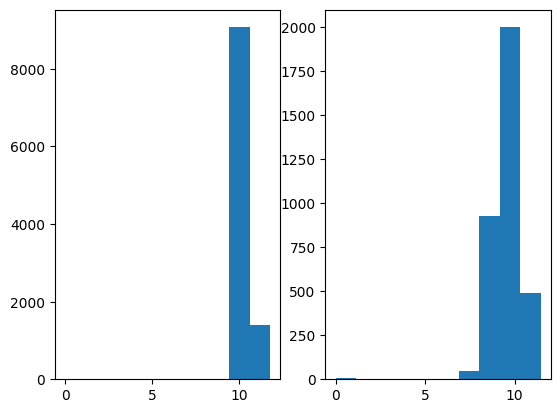

In [35]:
_, axs = plt.subplots(1, 2)
axs[0].hist(np.log10(df_refinitiv_filtered_train.Revenue - df_refinitiv_filtered_train.Revenue.min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test.Revenue - df_refinitiv_filtered_test.Revenue.min() + 1))
plt.show()

In [36]:
df_refinitiv_filtered.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered.drop_duplicates("Name")) * 100

Europe and Central Asia          41.367862
East Asia and Pacific            24.402390
North America                    21.978752
Latin America & the Caribbean     5.544489
Sub-Saharan Africa                2.888446
South Asia                        2.689243
Middle East and North Africa      1.128818
Name: Region, dtype: float64

In [37]:
df_refinitiv_filtered_test.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("Name")) * 100
# lower importance of north america and more of others

Europe and Central Asia          43.974359
East Asia and Pacific            28.846154
North America                    12.051282
Latin America & the Caribbean     6.666667
Sub-Saharan Africa                4.102564
South Asia                        2.820513
Middle East and North Africa      1.538462
Name: Region, dtype: float64

In [38]:
df_refinitiv_filtered_train.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("Name")) * 100

Europe and Central Asia          40.456989
North America                    25.448029
East Asia and Pacific            22.849462
Latin America & the Caribbean     5.152330
South Asia                        2.643369
Sub-Saharan Africa                2.464158
Middle East and North Africa      0.985663
Name: Region, dtype: float64

In [39]:
df_refinitiv_filtered.CountryHQ.value_counts()/len(df_refinitiv_filtered)*100
# 40 % des données sont issues de 3 pays, d'où l'intérêt de l'exercice

United States of America    18.598305
United Kingdom              11.776533
Japan                        9.256068
South Africa                 4.172052
France                       4.100244
                              ...    
Liechtenstein                0.021542
Slovenia                     0.014362
Uruguay                      0.007181
Jordan                       0.007181
Ukraine                      0.007181
Name: CountryHQ, Length: 69, dtype: float64

In [40]:
df_refinitiv_filtered_train.CountryHQ.value_counts()/len(df_refinitiv_filtered_train)*100

United States of America    22.378358
United Kingdom              13.488194
Japan                        9.922570
Canada                       3.775930
Germany                      3.517828
                              ...    
Egypt                        0.028678
Czech Republic               0.019119
Jersey                       0.019119
Slovenia                     0.009559
Ukraine                      0.009559
Name: CountryHQ, Length: 64, dtype: float64

In [41]:
df_refinitiv_filtered_test.CountryHQ.value_counts()/len(df_refinitiv_filtered_test)*100

Japan                       7.243867
United States of America    7.186147
United Kingdom              6.608947
South Africa                6.580087
France                      6.031746
                              ...   
Egypt                       0.028860
Jordan                      0.028860
Uruguay                     0.028860
Isle of Man                 0.028860
Slovenia                    0.028860
Name: CountryHQ, Length: 62, dtype: float64

In [42]:
df_refinitiv_filtered_test.drop_duplicates("Name").GICSName.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("Name")) * 100
# Less imbalanced repartition of sectors

Real Estate Development              1.282051
Construction Materials               1.282051
Diversified Banks                    1.282051
Electrical Components & Equipment    1.153846
Multi-line Insurance                 1.153846
                                       ...   
Commercial Printing                  0.128205
Housewares & Specialties             0.128205
Security & Alarm Services            0.128205
Technology Distributors              0.128205
Specialized Consumer Services        0.128205
Name: GICSName, Length: 155, dtype: float64

In [43]:
df_refinitiv_filtered_train.drop_duplicates("Name").GICSName.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("Name")) * 100

Diversified Banks                   7.078853
Packaged Foods & Meats              2.956989
Construction & Engineering          2.553763
Asset Management & Custody Banks    2.374552
Industrial Machinery                2.374552
                                      ...   
Silver                              0.044803
Hotel & Resort REITs                0.044803
Mortgage REITs                      0.044803
Housewares & Specialties            0.044803
Security & Alarm Services           0.044803
Name: GICSName, Length: 158, dtype: float64

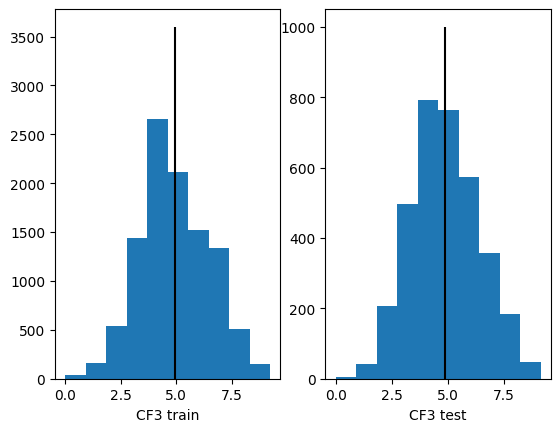

In [47]:
_, axs = plt.subplots(1, 2)
col = "CF3"
axs[0].hist(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test[col]  - df_refinitiv_filtered_test[col].min() + 1))
axs[0].set_xlabel(col + " train")
axs[1].set_xlabel(col + " test")
axs[0].vlines(np.mean(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1)),0,3600, color="black")
axs[1].vlines(np.mean(np.log10(df_refinitiv_filtered_test[col] - df_refinitiv_filtered_test[col].min() + 1)),0,1000, color="black")

plt.show()

In [49]:
scope = "CF3"
a = df_refinitiv_filtered_test[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
b = df_refinitiv_filtered_train[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
a/b

0.01    1.789628
0.10    0.930674
0.20    0.857556
0.30    0.950458
0.40    1.043119
0.50    1.095929
0.60    1.043813
0.70    0.745753
0.80    0.555530
0.90    0.751068
0.99    0.918715
Name: CF3, dtype: float64

In [50]:
df_refinitiv_filtered_test.Name.drop_duplicates().to_csv("lst_companies_test_GICS.csv",index=False)